<a href="https://colab.research.google.com/github/ayoabass777/Zara-data-analytics-project/blob/main/Zara_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/zara.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv(file_path, sep=';')

In [ ]:
data.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
numerical_stats =data.describe()
categorical_stats = data.describe(include=['O'])

In [ ]:
numerical_stats

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [ ]:
categorical_stats

,Product Position,Promotion,Product Category,Seasonal,brand,url,sku,name,description,currency,scraped_at,terms,section
count,252,252,252,252,252,252,252,251,250,252,252,252,252
unique,3,2,1,2,1,228,228,194,221,1,229,5,2
top,Aisle,No,Clothing,Yes,Zara,https://www.zara.com/us/en/oversized-knit-swea...,318209963-800-2,PLAID OVERSHIRT,Varsity jacket with elastic collar and long sl...,USD,2024-02-19T09:10:39.415761,jackets,MAN
freq,97,132,252,128,252,2,2,6,4,252,2,140,218


In [ ]:
print(data['Promotion'].unique())

['No' 'Yes']


##Data Cleaning

### Filling missing data
The missing name was filled using the url link to check the product details

In [ ]:
missing_values = data.isnull().sum()
missing_values

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [ ]:
missing_name_row = data[data['name'].isnull()]
missing_name_row

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [ ]:
data.loc[72, 'name'] = 'WAXED EFFECT JACKET'

In [ ]:
data.loc[72]

Product ID                                              173576
Product Position                                       End-cap
Promotion                                                  Yes
Product Category                                      Clothing
Seasonal                                                    No
Sales Volume                                              1838
brand                                                     Zara
url                 https://www.zara.com/us/en/-p04310461.html
sku                                            336378923-700-2
name                                       WAXED EFFECT JACKET
description                                                NaN
price                                                    129.0
currency                                                   USD
scraped_at                          2024-02-19T08:50:54.476057
terms                                                  jackets
section                                                

In [ ]:
duplicate = data.duplicated()
print(duplicate.any())

False


### Creating a revenue column
**Revenue** : This created by multiplying the sales volume for each product by the prices. This provides information on how much money was generated from each product.

In [ ]:
data['Revenue'] = data['Sales Volume'] * data['price']

In [ ]:
data['Revenue'].sum()

38988476.480000004

## Dropping columns
1. **Product Category**: This feature would be dropped because all datapoints share the same category - <b>*clothing*</b>, hence this does not provide any additional information.
2. **Brand**: This feature is the same for all the rows, hence it does not provide any additional information for analysis.
3. **URL**: This feature contains links to each product's page. This would not be used for the analysis.
4. **Stock Keeping Unit (SKU)**: This feature is an alphanumeric code used to track each product. This would be dropped becuase it is only used for product tracking as it does not provide any intrinsic information, and its high cardinality.
5. **Description**: This contains information on each product which would not be used for the analysis.
6. **Currency**: The currency is the same for all the data points.
7. **Scraped_at**: This indicates the time the data was scraped.

In [ ]:
data.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section',
       'Revenue'],
      dtype='object')

In [ ]:
cleaned_data = data.drop(['Product Category', 'brand', 'url','sku','description','currency','scraped_at'], axis = 1)

In [ ]:
cleaned_data
cleaned_data.to_csv('Zara_cleaned.csv')

#Exploratory Data Analysis


## The total number of sales made by zara

In [ ]:
total_sales = cleaned_data['Sales Volume'].sum()
print(f"Zara achieved sales of {total_sales} items")

Zara achieved sales of 459573 items


## The total amount of revenue generated by zara

In [ ]:
total_revenue = cleaned_data['Revenue'].sum()
print(f"Zara generated revenue of ${total_revenue:,.2f}")

Zara generated revenue of $38,988,476.48


## Sales and Price distribution

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:

def quant_univariate_distribution(quantitative_variable):
  sns.set_palette('muted')
  # Distribution of "Sales Volume"
  plt.figure(figsize=(14, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(cleaned_data[quantitative_variable], bins=30, kde=True)
  plt.title(f'Distribution of {quantitative_variable}')

  plt.subplot(1, 2, 2)
  sns.boxplot(y=cleaned_data[quantitative_variable])
  plt.title(f'Boxplot of {quantitative_variable}')

  plt.tight_layout()
  plt.show()

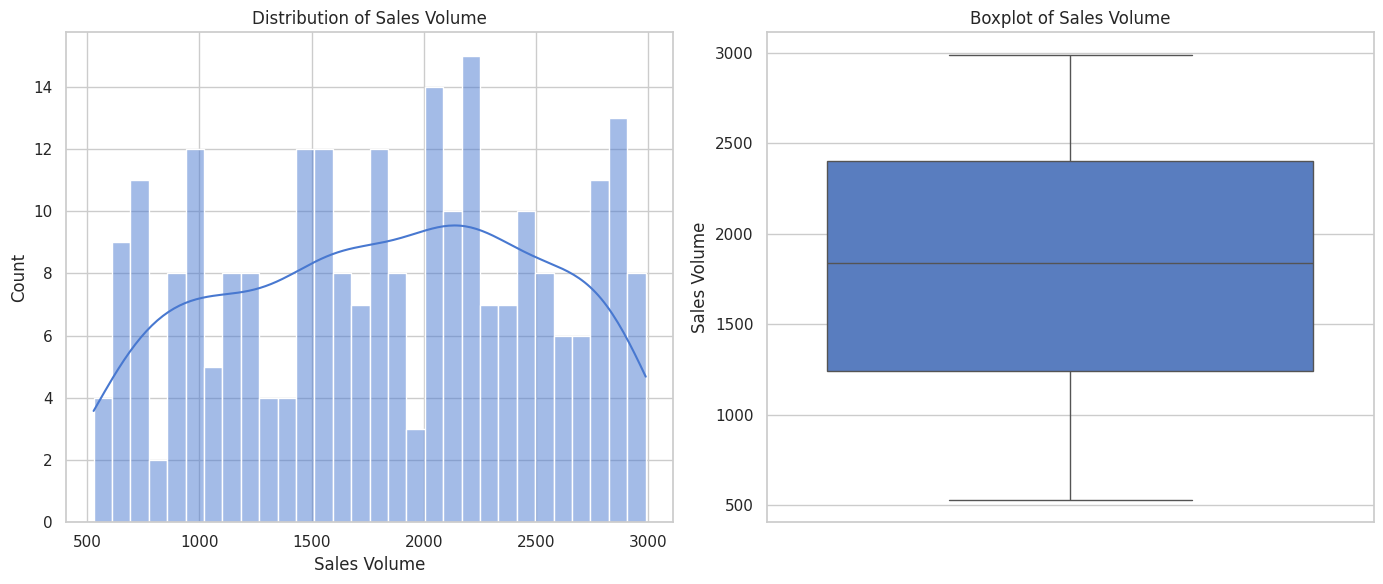

In [ ]:
quant_univariate_distribution('Sales Volume')

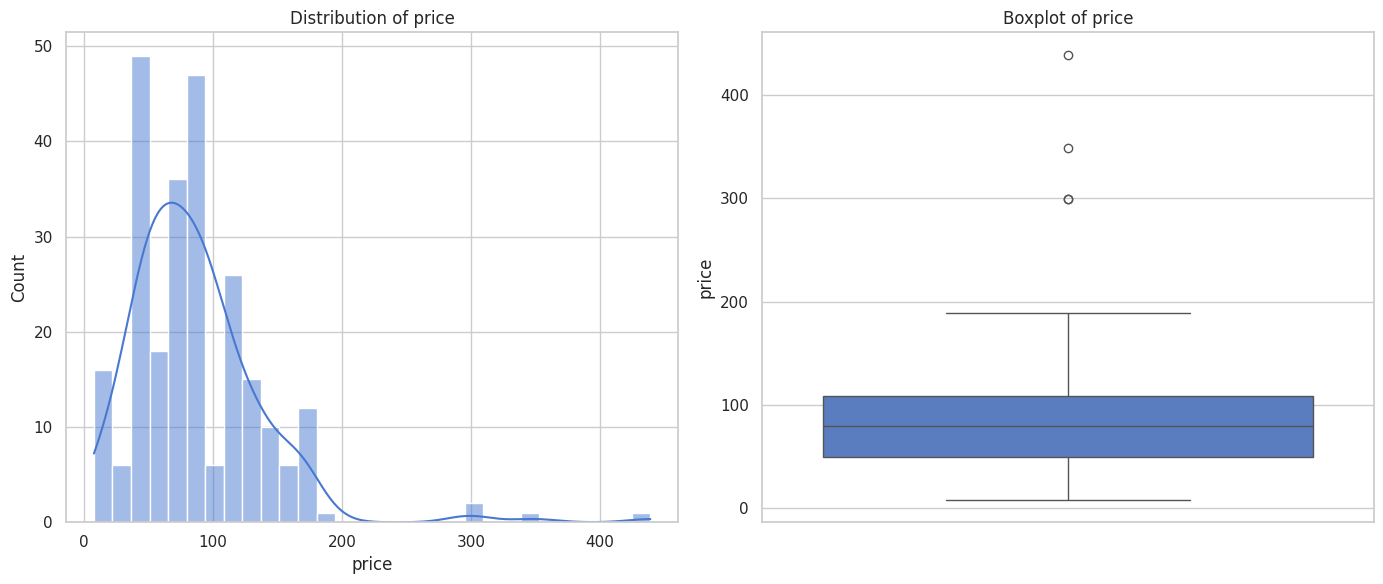

In [ ]:
quant_univariate_distribution('price')

## Sales Volume by features

In [ ]:
sales_by_position= cleaned_data.groupby('Product Position')['Sales Volume'].sum()
sales_by_position

Product Position
Aisle             177396
End-cap           152930
Front of Store    129247
Name: Sales Volume, dtype: int64

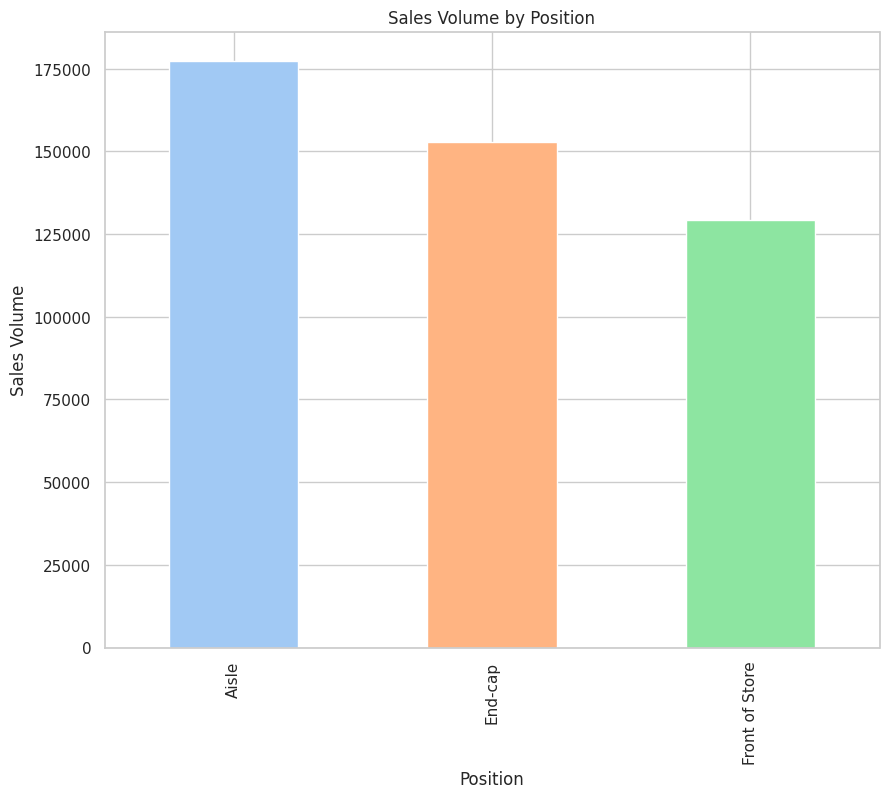

In [ ]:
pastel_colors = sns.color_palette("pastel", len(sales_by_position))
sales_by_position.plot(kind='bar', figsize=(10, 8), color=pastel_colors)
plt.title('Sales Volume by Position')
plt.xlabel('Position')
plt.ylabel('Sales Volume')
plt.show()

**Produts on the aisle generated the most sales**

\




##Sales by Promotion


In [ ]:
sales_by_promotion= cleaned_data.groupby('Promotion')['Sales Volume'].sum()
sales_by_promotion

Promotion
No     240312
Yes    219261
Name: Sales Volume, dtype: int64

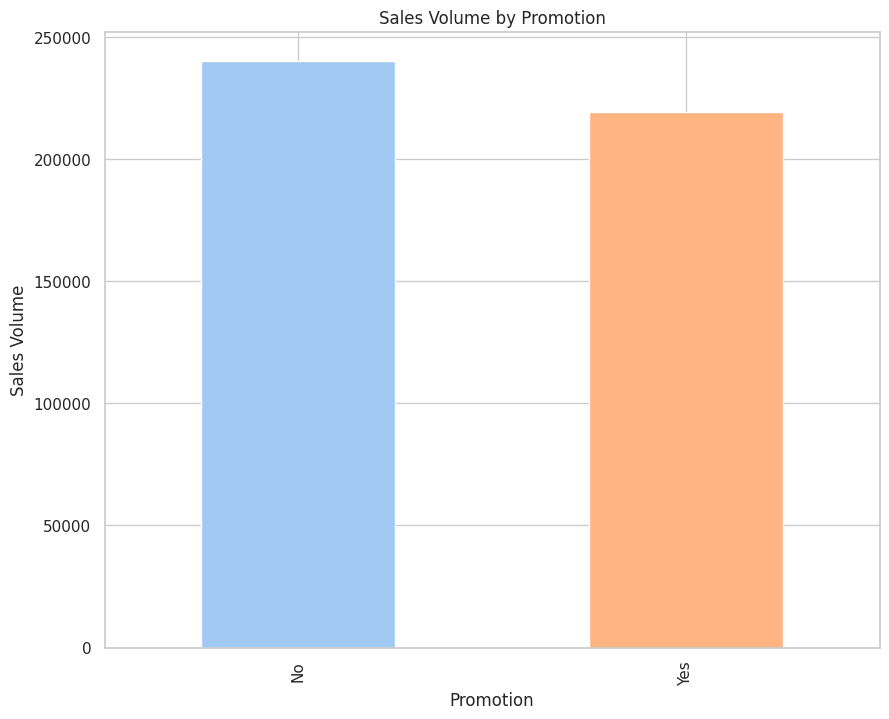

In [ ]:
pastel_colors = sns.color_palette("pastel", len(sales_by_promotion))
sales_by_promotion.plot(kind='bar', figsize=(10, 8), color=pastel_colors)
plt.title('Sales Volume by Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales Volume')
plt.show()

**Products without promotion had the higher sales volume**

\

## Sales by Seasonality

In [ ]:
sales_by_seasonality= cleaned_data.groupby('Seasonal')['Sales Volume'].sum()
sales_by_seasonality

Seasonal
No     226392
Yes    233181
Name: Sales Volume, dtype: int64


\


## Sale Volume by Demography

In [ ]:
sales_by_section= cleaned_data.groupby('section')['Sales Volume'].sum()
sales_by_section

section
MAN      396199
WOMAN     63374
Name: Sales Volume, dtype: int64

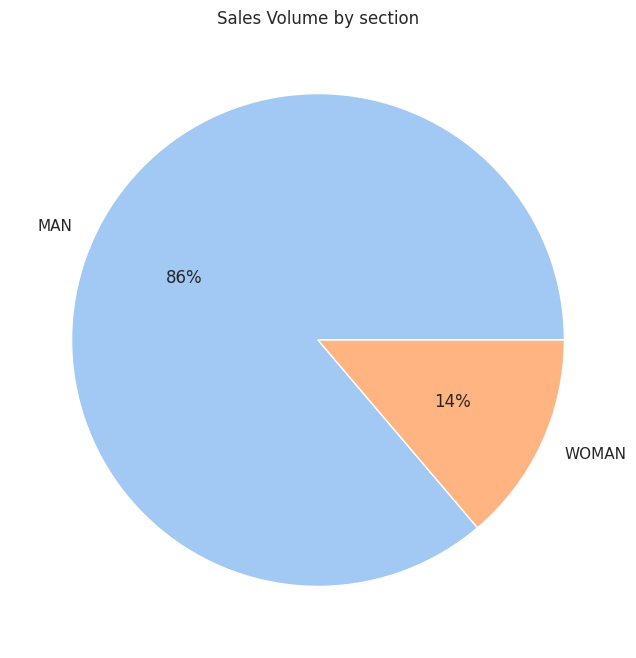

In [ ]:
plt.figure(figsize=(10,8))
sales_by_section.plot(kind='pie', autopct= '%1.0f%%', colors=sns.set_palette('pastel'))
plt.title('Sales Volume by section')
plt.ylabel('')
plt.show()

**Women section only contributed 14% of the total sales volume**<br>


\

## Sales Volume by terms

In [ ]:
sales_by_terms = cleaned_data.groupby('terms')['Sales Volume'].sum()
print(sales_by_terms)

terms
jackets     259468
jeans        13320
shoes        57906
sweaters     75242
t-shirts     53637
Name: Sales Volume, dtype: int64


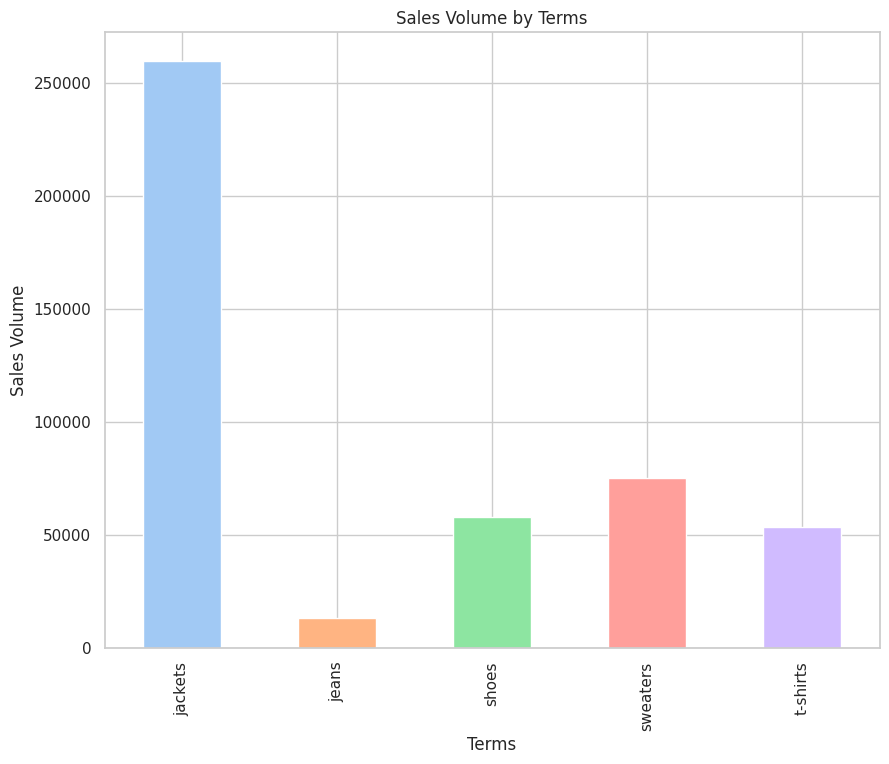

In [ ]:
pastel_colors = sns.color_palette("pastel", len(sales_by_terms))
sales_by_terms.plot(kind='bar', figsize=(10, 8), color=pastel_colors)
plt.title('Sales Volume by Terms')
plt.xlabel('Terms')
plt.ylabel('Sales Volume')
plt.show()

## Revenue generated by terms

In [ ]:
revenue_by_terms= cleaned_data.groupby('terms')['Revenue'].sum()
revenue_by_terms = revenue_by_terms.sort_values( ascending= False)
print(revenue_by_terms)

terms
jackets     26581815.87
sweaters     4090631.48
shoes        3754837.63
t-shirts     3696806.25
jeans         864385.25
Name: Revenue, dtype: float64


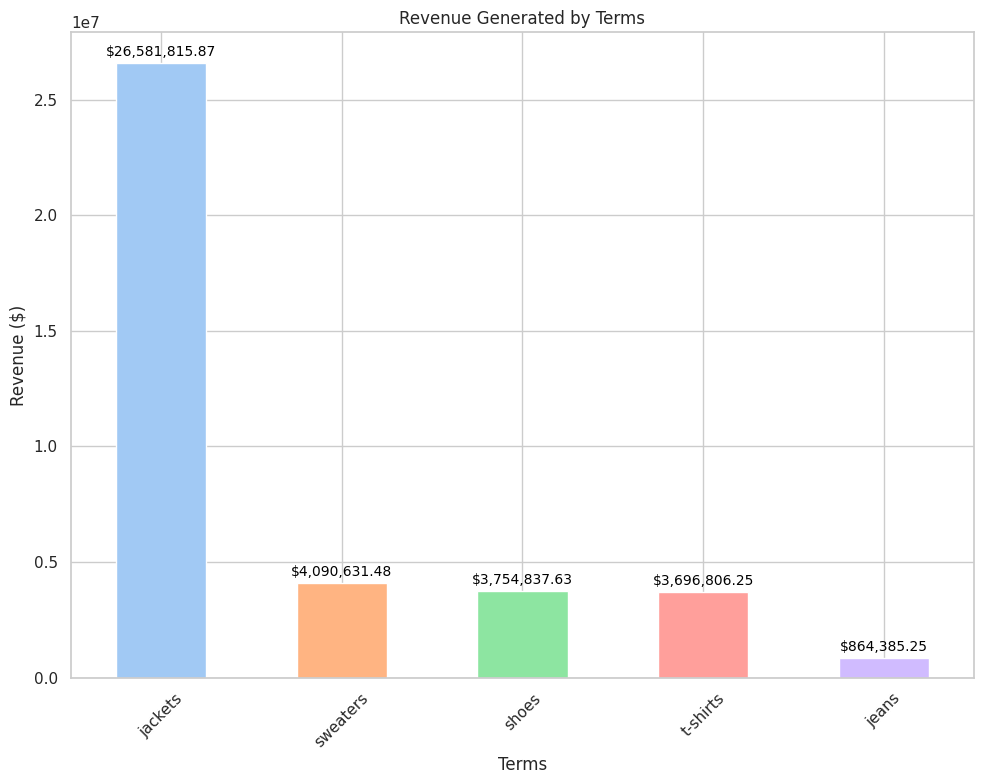

In [ ]:
ax = revenue_by_terms.plot(kind='bar', x='terms', y='Revenue', figsize=(10, 8), color=pastel_colors, legend=False)
plt.title('Revenue Generated by Terms')
plt.xlabel('Terms')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.tight_layout()

# Adding the revenue values on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
term_sales_by_section = cleaned_data.groupby(['terms', 'section'])['Sales Volume'].sum().unstack().fillna(0)
term_sales_by_section

section,MAN,WOMAN
terms,,
jackets,259468.0,0.0
jeans,13320.0,0.0
shoes,57906.0,0.0
sweaters,11868.0,63374.0
t-shirts,53637.0,0.0


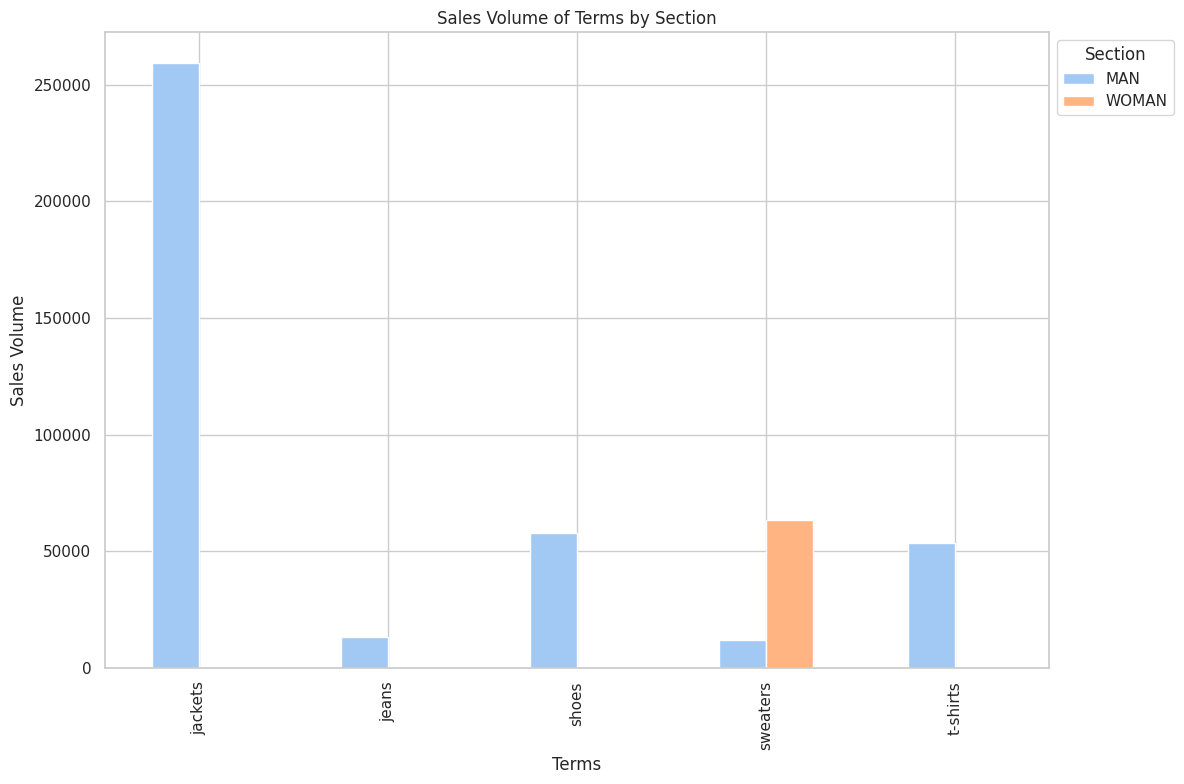

In [ ]:

term_sales_by_section.plot(kind='bar', figsize=(12,8))
plt.title('Sales Volume of Terms by Section')
plt.xlabel('Terms')
plt.ylabel('Sales Volume')
plt.legend(title='Section',bbox_to_anchor=(1,1), loc ='upper left')
plt.tight_layout()
plt.show()

This analysis shows the data might be imbalanced with women section only having sales in sweaters. This could also explain women contribute to a smaller percentage in sales.

Further Analysis on this dataset would not regard the section due to imbalance highlighted from this column

\

###Average Sales by term

In [ ]:
avg_sales_by_terms= cleaned_data.groupby('terms')['Sales Volume'].mean()
print(avg_sales_by_terms)

terms
jackets     1853.342857
jeans       1665.000000
shoes       1867.935484
sweaters    1835.170732
t-shirts    1676.156250
Name: Sales Volume, dtype: float64


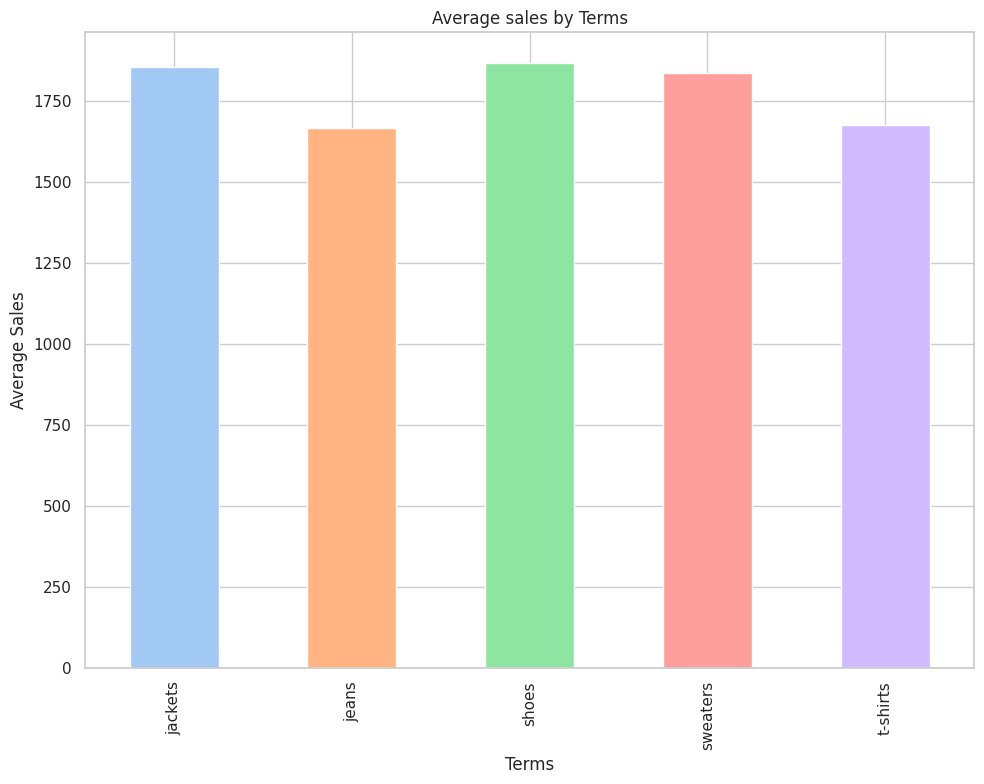

In [ ]:

avg_sales_by_terms.plot(kind='bar', figsize=(10,8), color=pastel_colors)
plt.title('Average sales by Terms')
plt.xlabel('Terms')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

###Average revenue by terms

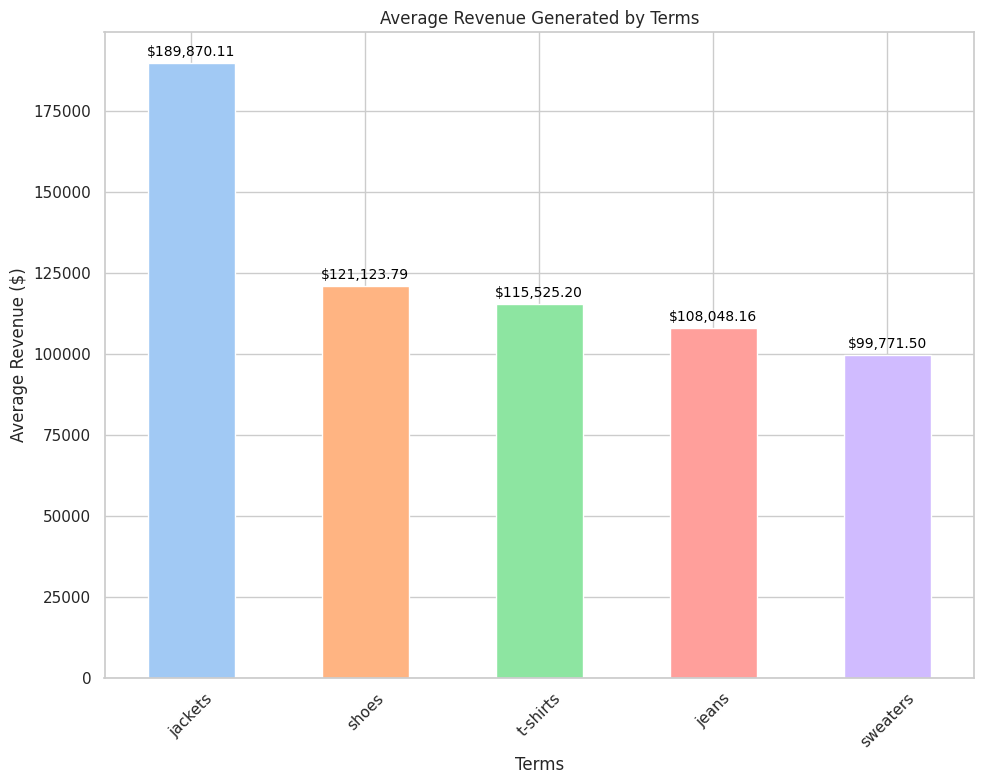

In [ ]:
average_revenue_by_terms = cleaned_data.groupby('terms')['Revenue'].mean().reset_index()

# Sort by average revenue in descending order
average_revenue_by_terms = average_revenue_by_terms.sort_values(by='Revenue', ascending=False)

# Plot the average revenue by terms
ax = average_revenue_by_terms.plot(kind='bar', x='terms', y='Revenue', figsize=(10, 8), color=pastel_colors, legend=False)
plt.title('Average Revenue Generated by Terms')
plt.xlabel('Terms')
plt.xticks(rotation=45)

plt.ylabel('Average Revenue ($)')
plt.tight_layout()

# Adding the average revenue values on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

\

#Analysis of Promotion, Seasonality, and Product Positioning

## Promotion effect on sales by term

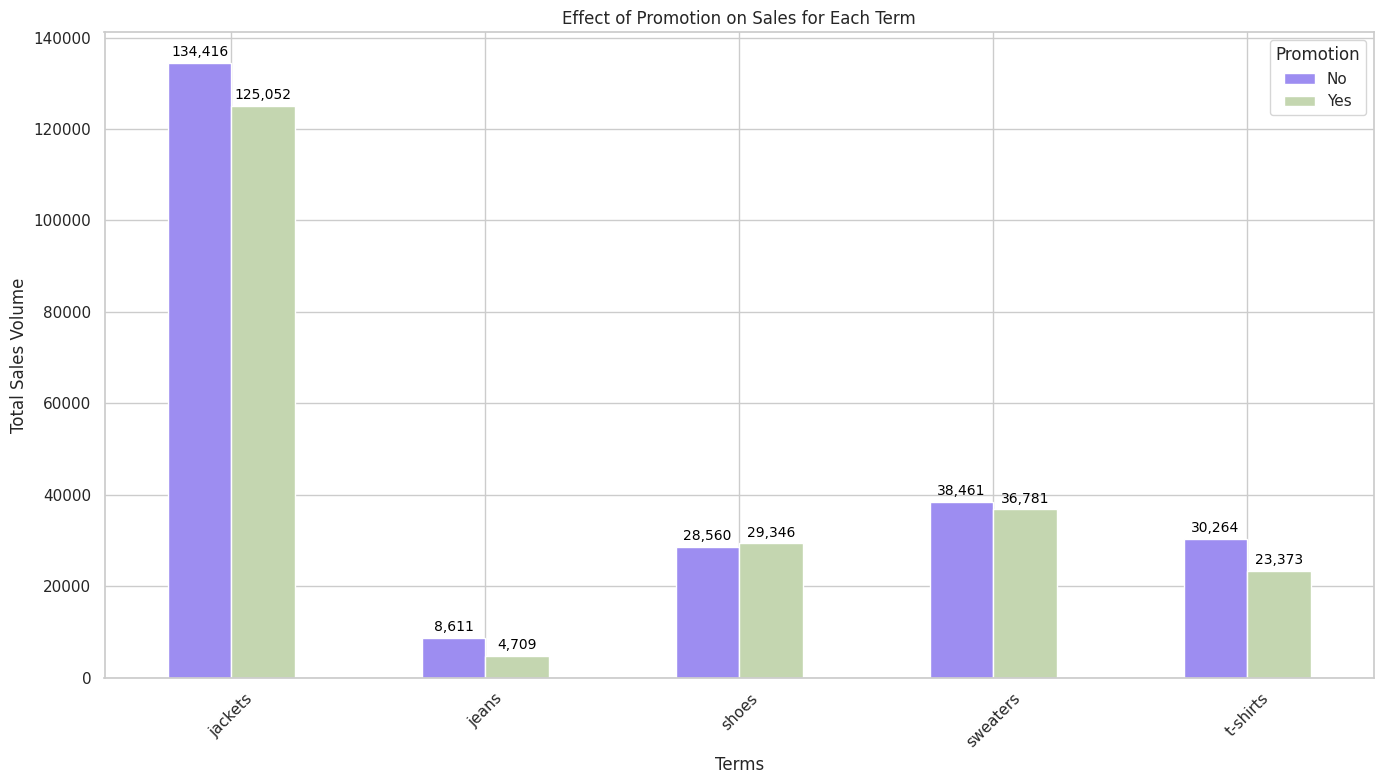

In [ ]:
# Grouping the data by 'terms' and 'Promotion' to calculate the sum of 'Sales Volume'
sales_by_promotion = cleaned_data.groupby(['terms', 'Promotion'])['Sales Volume'].sum().unstack().fillna(0)

# Plotting the effect of promotion on sales for each term
ax = sales_by_promotion.plot(kind='bar', figsize=(14, 8), color=['#9D8DF1', '#C4D6B0'])
plt.title('Effect of Promotion on Sales for Each Term')
plt.xlabel('Terms')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the sales volume values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Dictionary to store t-test results
t_test_results = {}

# Iterate over each term to perform t-test
for term in cleaned_data['terms'].unique():
    # Filter the data for the current term
    term_data = cleaned_data[cleaned_data['terms'] == term]

    # Separate the sales volumes based on promotion status
    sales_promoted = term_data[term_data['Promotion'] == 'Yes']['Sales Volume']
    sales_not_promoted = term_data[term_data['Promotion'] == 'No']['Sales Volume']

    # Perform t-test
    t_stat, p_value = ttest_ind(sales_promoted, sales_not_promoted, equal_var=False)
    t_test_results[term] = {'t_stat': t_stat, 'p_value': p_value}

# Convert the results to a DataFrame for better visualization
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index').reset_index()
t_test_results_df.columns = ['Term', 'T-Statistic', 'P-Value']

t_test_results_df

,Term,T-Statistic,P-Value
0,jackets,-0.242228,0.808964
1,shoes,-0.297973,0.767864
2,sweaters,1.496664,0.143025
3,jeans,-0.397094,0.710563
4,t-shirts,-0.881648,0.385005


All p-values are greater than 0.05, indicating that we fail to reject the null hypothesis for all terms.
This suggests no statistically significant difference in sales volume between promoted and non-promoted items for these terms.


**Promotions do not significantly impact the sale volume for Jackets, Shoes, Sweaters, Jeans, or T-shirts.**

###Promotion effect on revenue

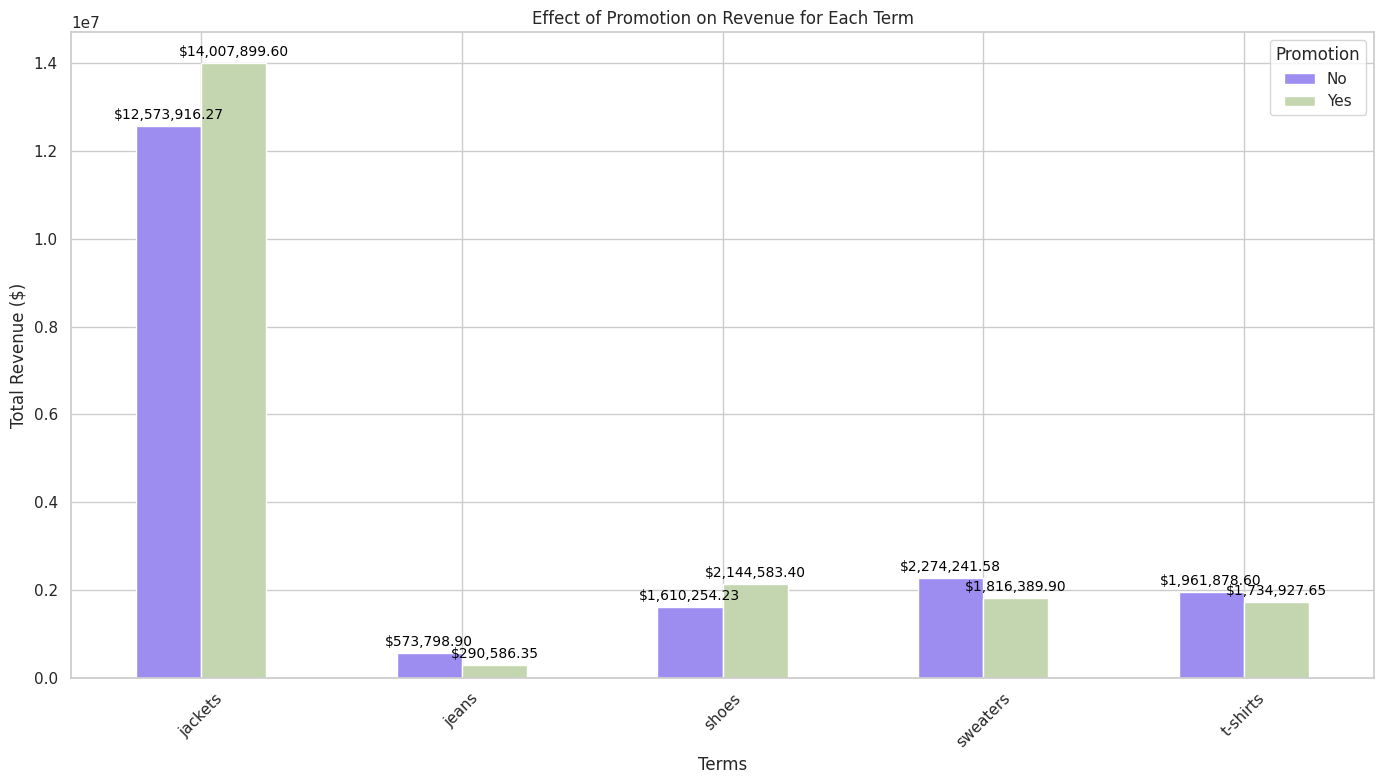

In [ ]:
# Grouping the data by 'terms' and 'Promotion' to calculate the sum of 'Revenue'
revenue_by_promotion = cleaned_data.groupby(['terms', 'Promotion'])['Revenue'].sum().unstack().fillna(0)

# Plotting the effect of promotion on revenue for each term
ax = revenue_by_promotion.plot(kind='bar', figsize=(14, 8), color=['#9D8DF1', '#C4D6B0'])
plt.title('Effect of Promotion on Revenue for Each Term')
plt.xlabel('Terms')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the revenue values on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [ ]:
# Dictionary to store t-test results for average revenue
t_test_revenue_results = {}

# Iterate over each term to perform t-test on average revenue
for term in cleaned_data['terms'].unique():
    # Filter the data for the current term
    term_data = cleaned_data[cleaned_data['terms'] == term]

    # Separate the revenues based on promotion status
    revenue_promoted = term_data[term_data['Promotion'] == 'Yes']['Revenue']
    revenue_not_promoted = term_data[term_data['Promotion'] == 'No']['Revenue']

    # Perform t-test
    t_stat, p_value = ttest_ind(revenue_promoted, revenue_not_promoted, equal_var=False) # Assuming unequal variance
    t_test_revenue_results[term] = {'t_stat': t_stat, 'p_value': p_value}

# Convert the results to a DataFrame for better visualization
t_test_revenue_results_df = pd.DataFrame.from_dict(t_test_revenue_results, orient='index').reset_index()
t_test_revenue_results_df.columns = ['Term', 'T-Statistic', 'P-Value']

t_test_revenue_results_df


,Term,T-Statistic,P-Value
0,jackets,1.614268,0.108787
1,shoes,1.208776,0.236517
2,sweaters,0.091492,0.927635
3,jeans,-0.361763,0.735680
4,t-shirts,0.007594,0.994004


All p-values are greater than 0.05, indicating that we fail to reject the null hypothesis for all terms.
This suggests no statistically significant difference in average revenue between promoted and non-promoted items for these terms.


**Promotions do not significantly impact the average revenue for Jackets, Shoes, Sweaters, Jeans, or T-shirts.**

**Effectiveness of Promotions**:

The lack of significant differences suggests that promotions do not have a substantial impact on increasing sales volumes and revenue for the terms analyzed.
This could imply that customers may not be significantly influenced by promotions for these specific product categories.

\

## Seasonal Effect on sales by term

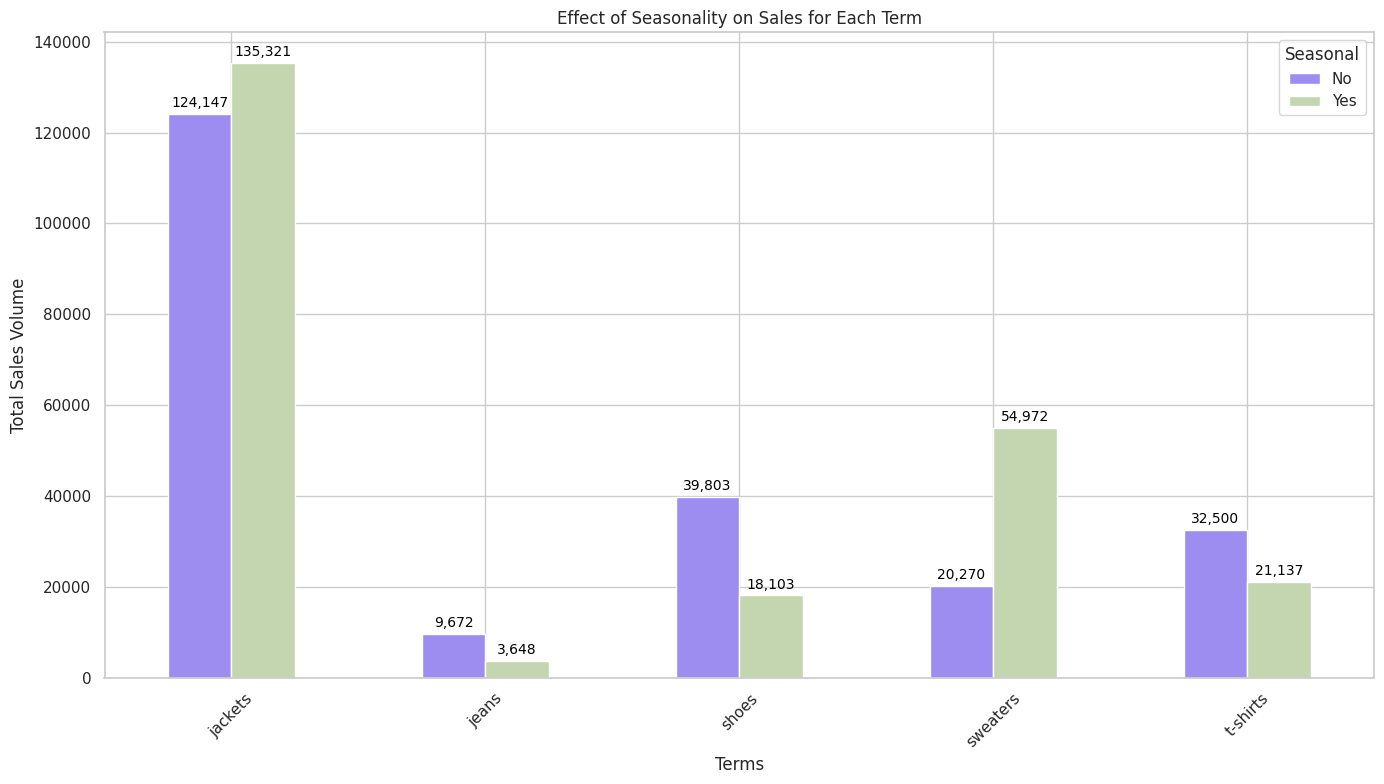

In [ ]:
# Grouping the data by 'terms' and 'Seasonal' to calculate the sum of 'Sales Volume'
sales_by_promotion = cleaned_data.groupby(['terms', 'Seasonal'])['Sales Volume'].sum().unstack().fillna(0)

# Plotting the effect of seasonality on sales for each term
ax = sales_by_promotion.plot(kind='bar', figsize=(14, 8), color=['#9D8DF1', '#C4D6B0'])
plt.title('Effect of Seasonality on Sales for Each Term')
plt.xlabel('Terms')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the sales volume values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
# Dictionary to store t-test results
t_test_results = {}

# Iterate over each term to perform t-test
for term in cleaned_data['terms'].unique():
    # Filter the data for the current term
    term_data = cleaned_data[cleaned_data['terms'] == term]

    # Separate the sales volumes based on promotion status
    sales_seasonal = term_data[term_data['Seasonal'] == 'Yes']['Sales Volume']
    sales_not_seasonal = term_data[term_data['Seasonal'] == 'No']['Sales Volume']

    # Perform t-test
    t_stat, p_value = ttest_ind(sales_seasonal, sales_not_seasonal, equal_var=False)
    t_test_results[term] = {'t_stat': t_stat, 'p_value': p_value}

# Convert the results to a DataFrame for better visualization
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index').reset_index()
t_test_results_df.columns = ['Term', 'T-Statistic', 'P-Value']

t_test_results_df

,Term,T-Statistic,P-Value
0,jackets,0.465989,0.641961
1,shoes,-1.507274,0.145177
2,sweaters,0.757523,0.457060
3,jeans,-1.794030,0.133399
4,t-shirts,-0.328723,0.744923


###Seasonal effect on revenue

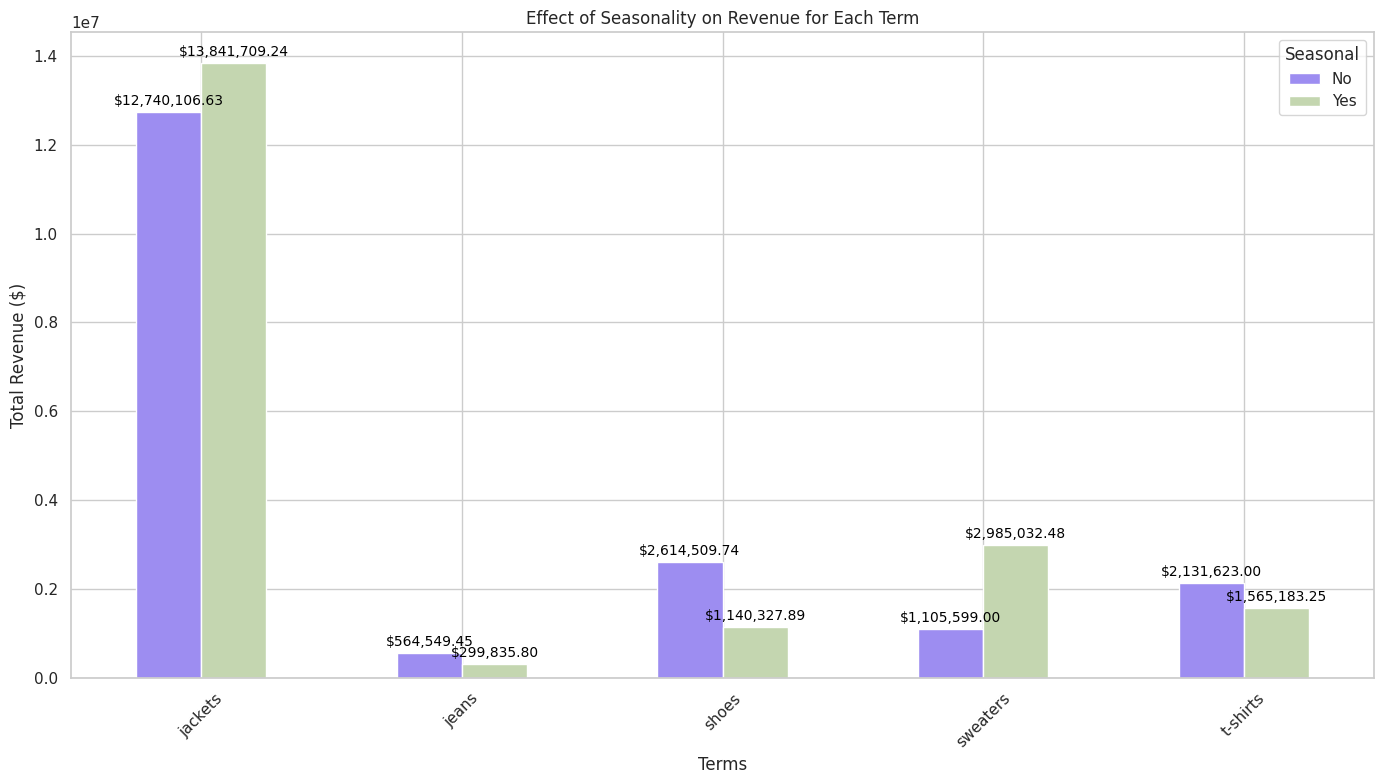

In [ ]:
# Grouping the data by 'terms' and 'Seasonal' to calculate the sum of 'Revenue'
revenue_by_promotion = cleaned_data.groupby(['terms', 'Seasonal'])['Revenue'].sum().unstack().fillna(0)

# Plotting the effect of Seasonality on revenue for each term
ax = revenue_by_promotion.plot(kind='bar', figsize=(14, 8), color=['#9D8DF1', '#C4D6B0'])
plt.title('Effect of Seasonality on Revenue for Each Term')
plt.xlabel('Terms')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the revenue values on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


\

##Product position effect on sales by term

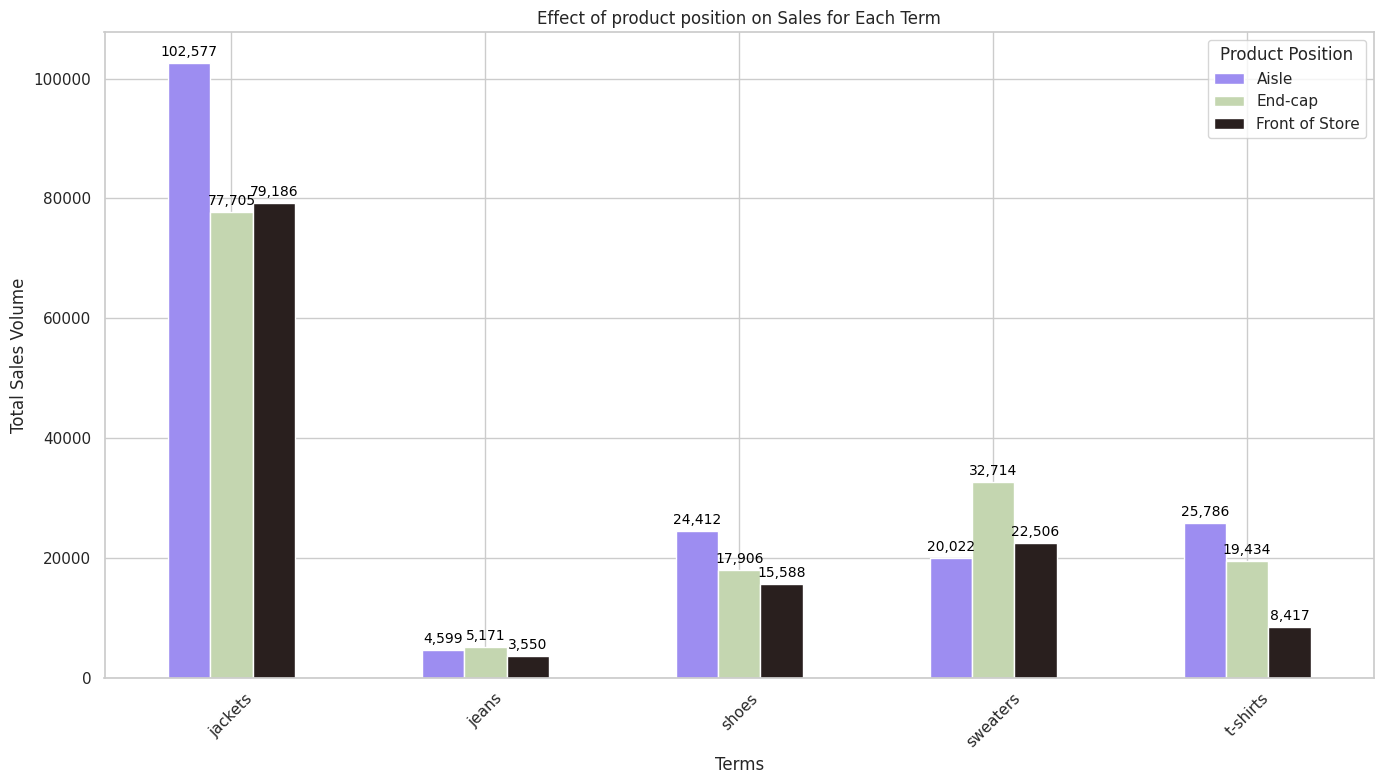

In [ ]:
# Grouping the data by 'terms' and 'Seasonal' to calculate the sum of 'Sales Volume'
sales_by_position = cleaned_data.groupby(['terms', 'Product Position'])['Sales Volume'].sum().unstack().fillna(0)

# Plotting the effect of seasonality on sales for each term
ax = sales_by_position.plot(kind='bar', figsize=(14, 8), color=['#9D8DF1', '#C4D6B0', '#291F1E'])
plt.title('Effect of product position on Sales for Each Term')
plt.xlabel('Terms')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the sales volume values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
import scipy.stats as stats

# Prepare the data for ANOVA test
positions = cleaned_data['Product Position'].unique()
sales_data = [cleaned_data[cleaned_data['Product Position'] == pos]['Sales Volume'] for pos in positions]

# Perform ANOVA test
anova_result = stats.f_oneway(*sales_data)

anova_result

F_onewayResult(statistic=0.35647260113929763, pvalue=0.700498369384668)

**Effect of Product Positioning :**The ANOVA test indicates a P-value greater than 0.05 which suggests Positioning does not have a significant impact on the sale.

## Price on Sales and revenue analysis

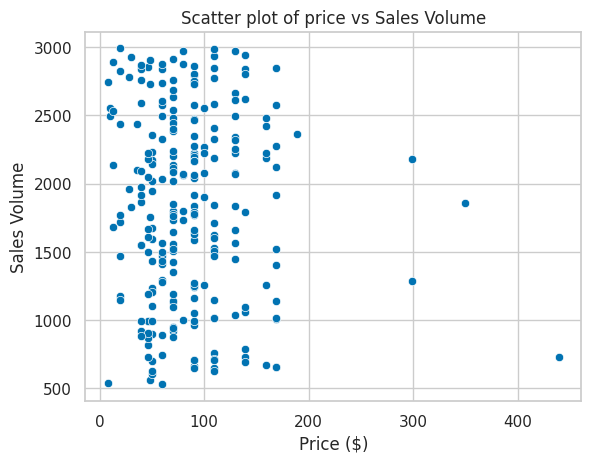

In [ ]:
sns.scatterplot(data=cleaned_data, x='price', y='Sales Volume')
plt.title('Scatter plot of price vs Sales Volume')
plt.xlabel('Price ($)')
plt.ylabel('Sales Volume')
plt.show()

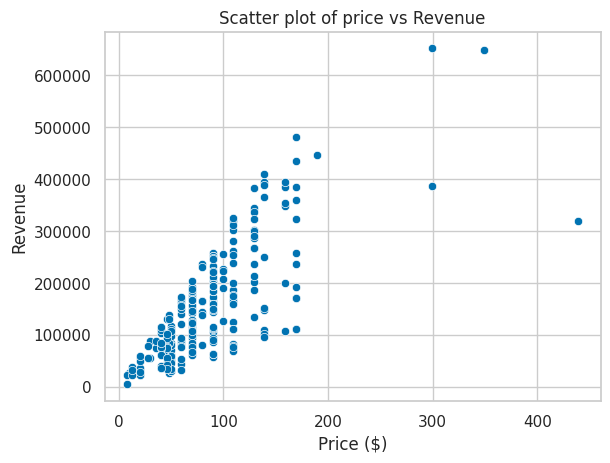

In [ ]:
sns.scatterplot(data=cleaned_data, x='price', y='Revenue')
plt.title('Scatter plot of price vs Revenue')
plt.xlabel('Price ($)')
plt.ylabel('Revenue')
plt.show()

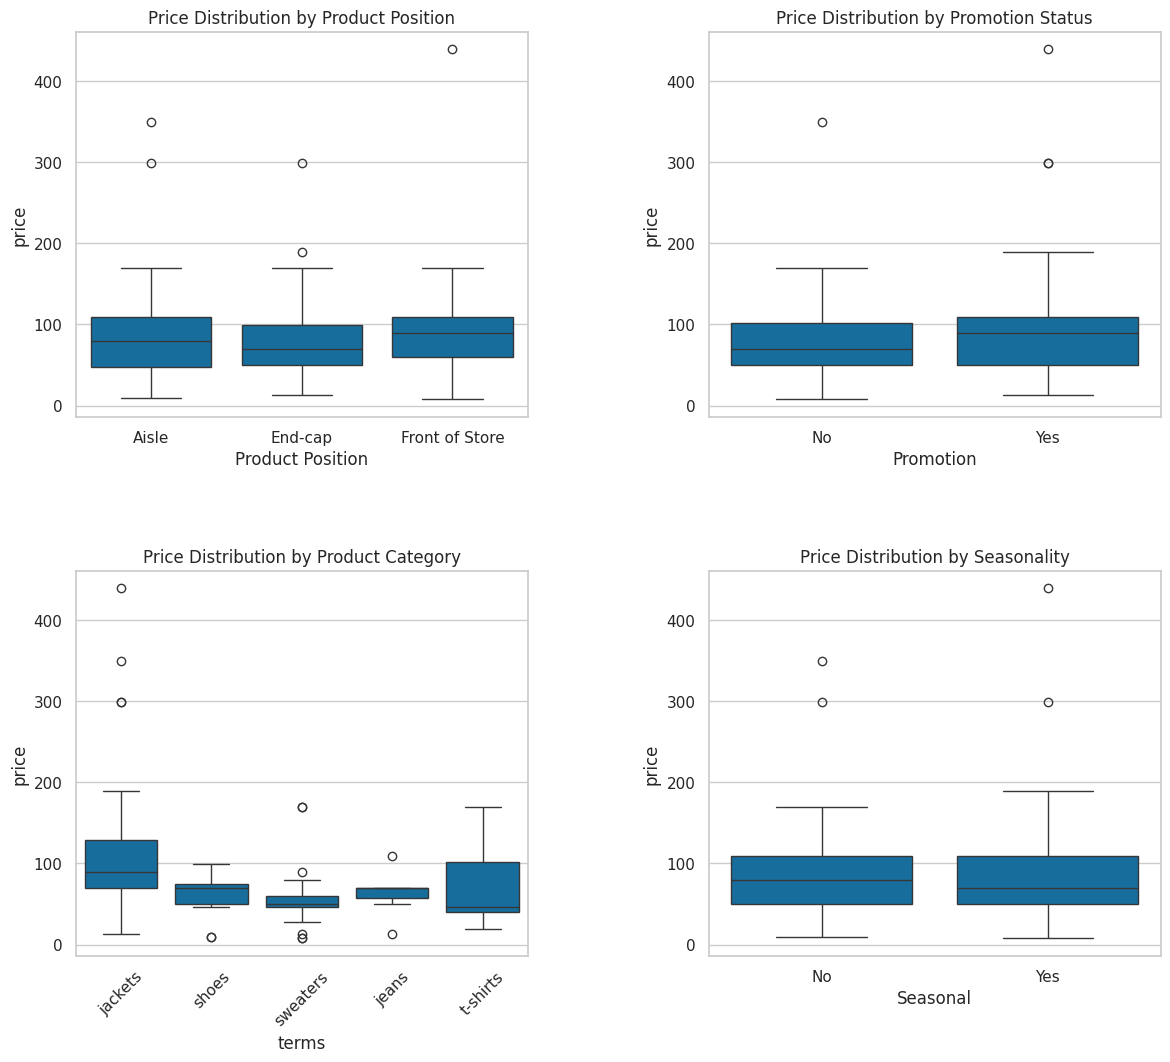

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plotting boxplots for price across different categorical variables
sns.boxplot(ax=axes[0, 0], x='Product Position', y='price', data=cleaned_data)
axes[0, 0].set_title('Price Distribution by Product Position')

sns.boxplot(ax=axes[0, 1], x='Promotion', y='price', data=cleaned_data)
axes[0, 1].set_title('Price Distribution by Promotion Status')

sns.boxplot(ax=axes[1, 0], x='terms', y='price', data=cleaned_data)
axes[1, 0].set_title('Price Distribution by Product Category')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

sns.boxplot(ax=axes[1, 1], x='Seasonal', y='price', data=cleaned_data)
axes[1, 1].set_title('Price Distribution by Seasonality')

plt.show()

\

## Conclusion and Insights


### Summary of Findings
- **Promotions**: No significant impact on sales and revenue.
- **Seasonality**: No significant effect on sales and revenue.
- **Product Positioning**: Consistent performance across different positions.